In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SP500ESGRiskRatings.csv')

In [3]:
df.shape

(503, 15)

In [4]:
df.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.30,12.80,6.60,5.80,Moderate Controversy Level,2.00,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.20,10.60,6.30,12.20,Moderate Controversy Level,2.00,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.60,0.10,8.40,14.10,Moderate Controversy Level,2.00,38th percentile,Medium


In [5]:
df.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,430.00,430.00,430.00,430.00,403.00
mean,21.53,5.74,6.73,9.07,2.01
std,6.89,5.09,2.21,3.66,0.79
min,7.10,0.00,3.00,0.80,1.00
25%,16.40,1.80,5.30,6.70,1.00
50%,21.05,4.05,6.10,8.90,2.00
75%,26.00,8.95,7.67,11.20,2.00
max,41.70,25.00,19.40,22.50,5.00


In [6]:
df['ESG Risk Level'].value_counts()

ESG Risk Level
Low           187
Medium        184
High           50
Negligible      6
Severe          3
Name: count, dtype: int64

In [7]:
df.columns

Index(['Symbol', 'Name', 'Address', 'Sector', 'Industry',
       'Full Time Employees', 'Description', 'Total ESG Risk score',
       'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score',
       'Controversy Level', 'Controversy Score', 'ESG Risk Percentile',
       'ESG Risk Level'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df['esg_risk_level'] = (
    df['esg_risk_level']
    .str.strip()
    .replace({'Negligible': 'Low', 'Severe': 'High'})
)

In [10]:
df.esg_risk_level.value_counts()

esg_risk_level
Low       193
Medium    184
High       53
Name: count, dtype: int64

In [11]:
with pd.option_context('display.max_colwidth', None):
    print(df.address.tail(10))

493                         5301 Stevens Creek Boulevard\nSanta Clara, CA 95051\nUnited States
494                                       1932 Wynnton Road\nColumbus, GA 31999\nUnited States
495                      4300 Wilson Boulevard\n11th Floor\nArlington, VA 22203\nUnited States
496                                 2485 Augustine Drive\nSanta Clara, CA 95054\nUnited States
497                                    345 Park Avenue\nSan Jose, CA 95110-2704\nUnited States
498                       1 Grand Canal Square\nGrand Canal Harbour\nDublin, D02 P820\nIreland
499                         1 North Waukegan Road\nNorth Chicago, IL 60064-6400\nUnited States
500             100 Abbott Park Road\nAbbott Park\nNorth Chicago, IL 60064-6400\nUnited States
501    11270 West Park Place\nSuite 170 PO Box 245008\nMilwaukee, WI 53224-9508\nUnited States
502                                        3M Center\nSaint Paul, MN 55144-1000\nUnited States
Name: address, dtype: object


In [12]:
df['location'] = df['address'].str.split('\n').str[-1]

In [13]:
df.location.value_counts()

location
United States     482
Ireland             9
Switzerland         4
United Kingdom      3
Bermuda             2
Netherlands         1
Canada              1
Name: count, dtype: int64

In [14]:
df.groupby('location')['esg_risk_level'].value_counts(normalize=True)

location        esg_risk_level
Bermuda         Low              0.50
                Medium           0.50
Canada          Low              1.00
Ireland         Low              0.75
                Medium           0.25
Netherlands     Low              1.00
Switzerland     Medium           0.67
                Low              0.33
United Kingdom  Low              0.50
                Medium           0.50
United States   Low              0.44
                Medium           0.43
                High             0.13
Name: proportion, dtype: float64

In [15]:
df['location_US'] = (df['location'] == 'United States').astype(int)

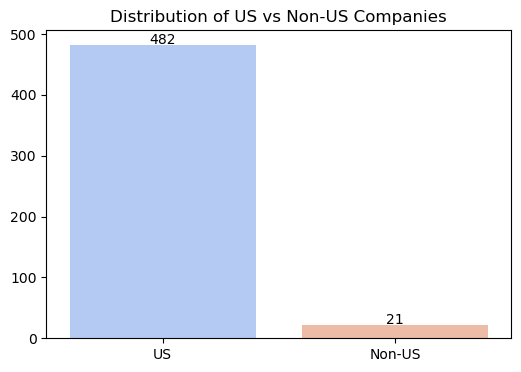

In [16]:
counts = df.location_US.value_counts()

plt.figure(figsize=(6,4))

ax = sns.barplot(
    x=['US', 'Non-US'],
    y=counts.values,
    palette='coolwarm'
)

for i, value in enumerate(counts.values):
    ax.text(i, value + 2, str(value), ha='center')

plt.title("Distribution of US vs Non-US Companies")
plt.show()

### Exploratory Data Analysis

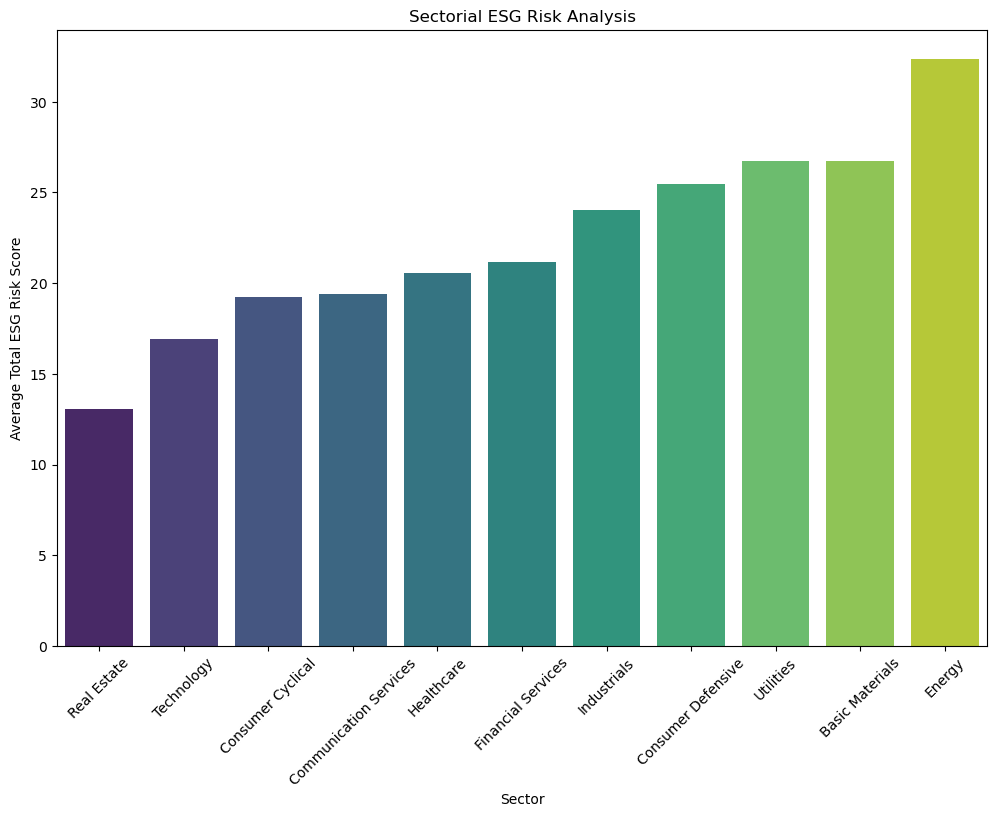

In [17]:
# BAR PLOT FOR SECTORIAL ESG RISK SCORE ANALYSIS

sectorial_risk = df.groupby('sector')['total_esg_risk_score'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=sectorial_risk.index, y=sectorial_risk.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Sectorial ESG Risk Analysis')
plt.xlabel('Sector')
plt.ylabel('Average Total ESG Risk Score')
plt.show()

Energy Sector has highest ESG Score. This means credit granting to industries in the energy sector requires stringent scrutiny.

In [18]:
df.dtypes

symbol                     object
name                       object
address                    object
sector                     object
industry                   object
full_time_employees        object
description                object
total_esg_risk_score      float64
environment_risk_score    float64
governance_risk_score     float64
social_risk_score         float64
controversy_level          object
controversy_score         float64
esg_risk_percentile        object
esg_risk_level             object
location                   object
location_US                 int64
dtype: object

In [19]:
df['full_time_employees'] = df['full_time_employees'].astype(str)
df['full_time_employees'] = df['full_time_employees'].str.replace(',', '')

df['full_time_employees'] = df['full_time_employees'].astype(float)

#### Investigating NULL Observations (MCAR, MAR, MNAR)

In [20]:
df.isnull().sum()

symbol                      0
name                        0
address                     1
sector                      1
industry                    1
full_time_employees         5
description                 1
total_esg_risk_score       73
environment_risk_score     73
governance_risk_score      73
social_risk_score          73
controversy_level          73
controversy_score         100
esg_risk_percentile        73
esg_risk_level             73
location                    1
location_US                 0
dtype: int64

In [21]:
null_percent = df.isnull().mean() * 100
null_percent

symbol                    0.00
name                      0.00
address                   0.20
sector                    0.20
industry                  0.20
full_time_employees       0.99
description               0.20
total_esg_risk_score     14.51
environment_risk_score   14.51
governance_risk_score    14.51
social_risk_score        14.51
controversy_level        14.51
controversy_score        19.88
esg_risk_percentile      14.51
esg_risk_level           14.51
location                  0.20
location_US               0.00
dtype: float64

###### CORRELATE MISSING OBSERVATIONS WITH NUMERIC COLUMNS

In [22]:
missing_mask = df.isna().astype(int)

missing_corr = missing_mask.corr()
print(missing_corr['total_esg_risk_score'])

symbol                    NaN
name                      NaN
address                  0.11
sector                   0.11
industry                 0.11
full_time_employees      0.02
description              0.11
total_esg_risk_score     1.00
environment_risk_score   1.00
governance_risk_score    1.00
social_risk_score        1.00
controversy_level        1.00
controversy_score        0.83
esg_risk_percentile      1.00
esg_risk_level           1.00
location                 0.11
location_US               NaN
Name: total_esg_risk_score, dtype: float64


Missing ESG risk score and risk level is perfectly correlated with environment_risk_score, governance_risk_score and social_risk_score. This may suggest that the missing observations most likely reflect firms without ESG ratings rather than random missingness. Missing At Random (MAR) is the most probable case for missingness. 

###### SECTORIAL INVESTIGATION OF MISSING OBSERVATIONS

In [23]:
df.groupby(df['total_esg_risk_score'].isna())['sector'].value_counts(normalize=True)

total_esg_risk_score  sector                
False                 Financial Services       0.15
                      Technology               0.14
                      Industrials              0.14
                      Healthcare               0.12
                      Consumer Cyclical        0.12
                      Consumer Defensive       0.08
                      Real Estate              0.07
                      Utilities                0.07
                      Energy                   0.05
                      Basic Materials          0.04
                      Communication Services   0.03
True                  Technology               0.21
                      Industrials              0.18
                      Healthcare               0.17
                      Communication Services   0.11
                      Consumer Cyclical        0.08
                      Utilities                0.06
                      Basic Materials          0.04
                   

In [24]:
df.groupby('sector')['total_esg_risk_score'].apply(lambda x: x.isna().mean())

sector
Basic Materials          0.14
Communication Services   0.36
Consumer Cyclical        0.11
Consumer Defensive       0.08
Energy                   0.09
Financial Services       0.05
Healthcare               0.18
Industrials              0.18
Real Estate              0.10
Technology               0.20
Utilities                0.12
Name: total_esg_risk_score, dtype: float64

Missing ESG risk scores and levels were sector-dependent, with Communication Services exhibiting the highest missing rate (36%) and Financial Services the lowest (5%). This suggests that ESG data availability is influenced by sector characteristics, consistent with a Missing At Random (MAR) mechanism likely driven by regulatory intensity and coverage bias.

Since, MAR applies to the missing observations. The observations will be dropped.

In [25]:
df.dropna(subset=['total_esg_risk_score'], inplace=True)

In [26]:
df.isnull().sum()

symbol                     0
name                       0
address                    0
sector                     0
industry                   0
full_time_employees        4
description                0
total_esg_risk_score       0
environment_risk_score     0
governance_risk_score      0
social_risk_score          0
controversy_level          0
controversy_score         27
esg_risk_percentile        0
esg_risk_level             0
location                   0
location_US                0
dtype: int64

In [27]:
cols_to_drop = [
    "symbol",
    "name",
    "address",
    "description",
    "location",
    "esg_risk_percentile",
    "esg_risk_level",
    "controversy_level"
]

df = df.drop(columns=cols_to_drop, errors="ignore")

In [28]:
df['full_time_employees'] = df['full_time_employees'].fillna(df['full_time_employees'].median())

In [31]:
df['controversy_score'].fillna(df['controversy_score'].median(), inplace=True)

In [35]:
num_cols = ['full_time_employees', 'environment_risk_score', 'governance_risk_score', 'social_risk_score', 'controversy_score']
cat_cols = ['sector', 'industry']

###### CHECKING FOR OUTLIERS

In [36]:
df.describe()

,full_time_employees,total_esg_risk_score,environment_risk_score,governance_risk_score,social_risk_score,controversy_score,location_US
count,430.00,430.00,430.00,430.00,430.00,430.00,430.00
mean,62997.35,21.53,5.74,6.73,9.07,2.01,0.96
std,148612.55,6.89,5.09,2.21,3.66,0.77,0.20
min,163.00,7.10,0.00,3.00,0.80,1.00,0.00
25%,11227.75,16.40,1.80,5.30,6.70,1.25,1.00
50%,22834.00,21.05,4.05,6.10,8.90,2.00,1.00
75%,61324.00,26.00,8.95,7.67,11.20,2.00,1.00
max,2100000.00,41.70,25.00,19.40,22.50,5.00,1.00


In [37]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[num_cols]))

outliers = (z_scores > 3)
print(np.sum(outliers, axis=0))

full_time_employees       3
environment_risk_score    4
governance_risk_score     5
social_risk_score         3
controversy_score         2
dtype: int64


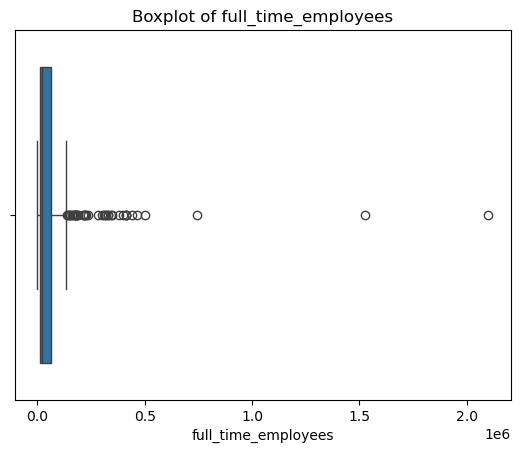

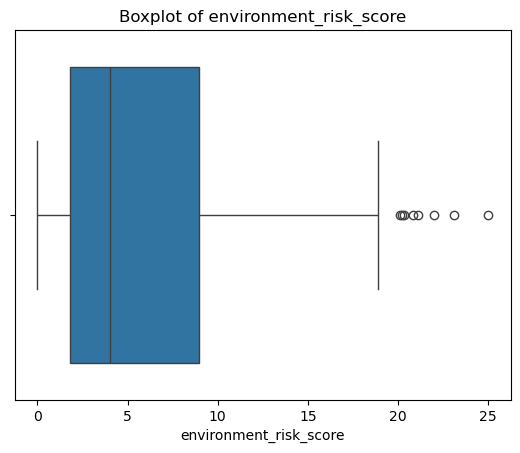

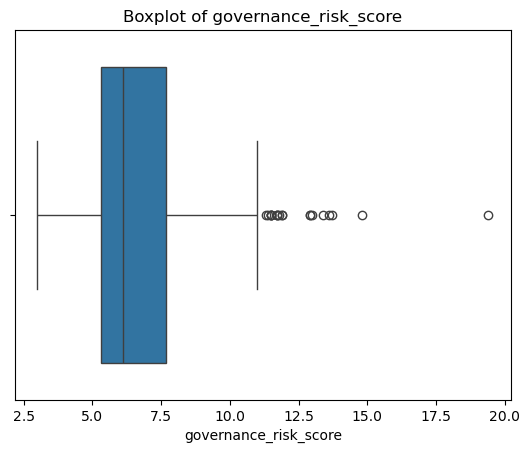

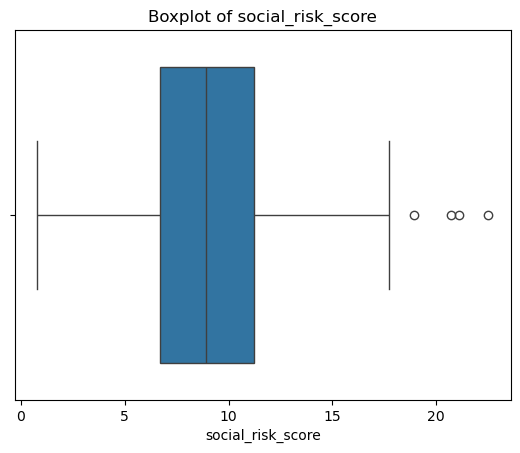

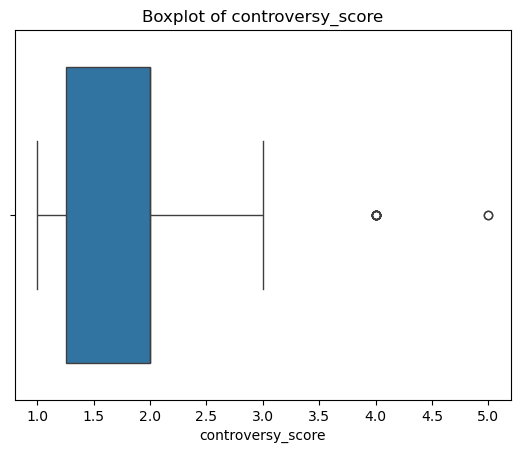

In [38]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

The combined outlier records is 15, which is around than 1% of the dataset per variable. The outliers review is satisfactory hence no row will be dropped

<Axes: xlabel='full_time_employees', ylabel='Count'>

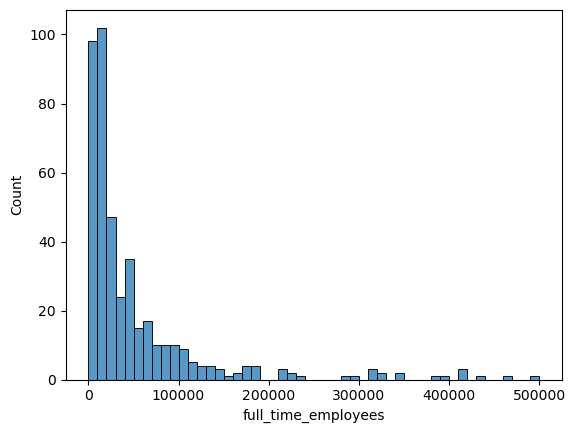

In [39]:
sns.histplot(df.full_time_employees[df.full_time_employees <= 500000] , bins=50)

full_time_employees is heavily right-skewed, log transformation will be applied

In [40]:
df['normalized_full_time_employees'] = np.log1p(df['full_time_employees'])

In [41]:
df.normalized_full_time_employees.describe()

count   430.00
mean     10.11
std       1.39
min       5.10
25%       9.33
50%      10.04
75%      11.02
max      14.56
Name: normalized_full_time_employees, dtype: float64

<Axes: xlabel='normalized_full_time_employees', ylabel='Count'>

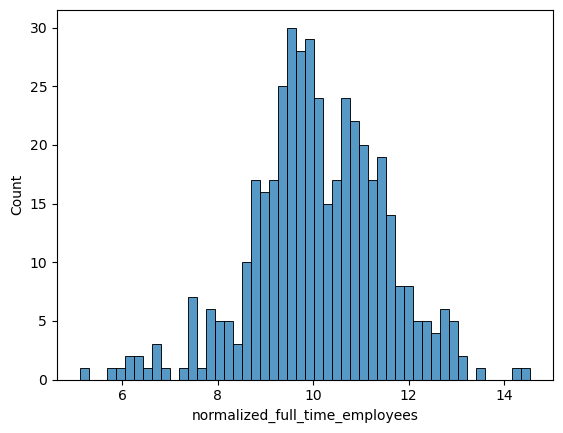

In [42]:
sns.histplot(df.normalized_full_time_employees, bins=50)

##### CHECKING IF ESG RISK LEVEL IS DERIVED FROM ENVIRONMENTAL, SOCIAL AND GOVERNANCE SCORES (LABEL LEAKAGE)

In [43]:
df.dtypes

sector                             object
industry                           object
full_time_employees               float64
total_esg_risk_score              float64
environment_risk_score            float64
governance_risk_score             float64
social_risk_score                 float64
controversy_score                 float64
location_US                         int64
normalized_full_time_employees    float64
dtype: object

In [46]:
# CHECK ONE => CORRELATION CHECK

df[['environment_risk_score',
    'governance_risk_score',
    'social_risk_score',
    'total_esg_risk_score']].corr()

,environment_risk_score,governance_risk_score,social_risk_score,total_esg_risk_score
environment_risk_score,1.00,-0.22,0.07,0.70
governance_risk_score,-0.22,1.00,0.36,0.35
social_risk_score,0.07,0.36,1.00,0.69
total_esg_risk_score,0.70,0.35,0.69,1.00


In [47]:
# CHECK TWO => SIMPLE AVERAGE

df['esg_avg'] = (
    df['environment_risk_score'] +
    df['governance_risk_score'] +
    df['social_risk_score']
) / 3

df[['esg_avg', 'total_esg_risk_score']].corr()

,esg_avg,total_esg_risk_score
esg_avg,1.00,1.00
total_esg_risk_score,1.00,1.00


In [48]:
# CHECK THREE => FITTING A LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

X = df[['environment_risk_score',
        'governance_risk_score',
        'social_risk_score']]

y = df['total_esg_risk_score']

model = LinearRegression()
model.fit(X, y)

preds = model.predict(X)

print("R²:", r2_score(y, preds))
print("MSE:", mean_squared_error(y,preds))
print("RMSE:", root_mean_squared_error(y,preds))

R²: 0.9999260308331683
MSE: 0.003502467752915076
RMSE: 0.05918165047474661


The 3 checks revealed that 'total_esg_risk_score' is derived from the 3 ESG component scores. 'environment_risk_score', 'governance_risk_score' and 'social_risk_score' are not recommended to be included as features to be trained. They are deterministic and eventually will give a false high accuracy.

###### CHECKING IF INDUSTRY WILL ENHANCE THE MODEL

In [49]:
df['industry'].value_counts().describe()

count   110.00
mean      3.91
std       3.33
min       1.00
25%       2.00
50%       3.00
75%       5.00
max      22.00
Name: count, dtype: float64

There are 110 unique industries, it mean one-hot encoding will create an additional 109 dummy variables. This is may lead to overfitting. Hence, 'industry' will also not be considered as a feature to be included for training.

In [50]:
df.isnull().sum()

sector                            0
industry                          0
full_time_employees               0
total_esg_risk_score              0
environment_risk_score            0
governance_risk_score             0
social_risk_score                 0
controversy_score                 0
location_US                       0
normalized_full_time_employees    0
esg_avg                           0
dtype: int64

### MODELLING

In [51]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score

In [52]:
df.columns

Index(['sector', 'industry', 'full_time_employees', 'total_esg_risk_score',
       'environment_risk_score', 'governance_risk_score', 'social_risk_score',
       'controversy_score', 'location_US', 'normalized_full_time_employees',
       'esg_avg'],
      dtype='object')

In [53]:
features = ['sector', 'normalized_full_time_employees', 'location_US', 'controversy_score']

X = df[features]
y = df['total_esg_risk_score']

In [54]:
# First split: full_train(train + validation data) and test data
# 80% full train data, 20% test data
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: train data and validation data
# 0.25 x 0.8(full_train data) => 80% train data, 20% validation data
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

In [55]:
print('X_full_train:', len(X_full_train), 'X_test:', len(X_test), 'y_full_train:', len(y_full_train), 'y_test:',len(y_test))
print('X_train:', len(X_train), 'X_val:', len(X_val), 'y_train:', len(y_train), 'y_val:', len(y_val))

X_full_train: 344 X_test: 86 y_full_train: 344 y_test: 86
X_train: 258 X_val: 86 y_train: 258 y_val: 86


In [56]:
# Process to dict

X_train_dict = X_train.to_dict(orient='records')
X_val_dict = X_val.to_dict(orient='records')
X_test_dict = X_test.to_dict(orient='records')

In [57]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(X_train_dict)
X_val = dv.transform(X_val_dict)
X_test = dv.transform(X_test_dict)

In [58]:
dv.get_feature_names_out()

array(['controversy_score', 'location_US',
       'normalized_full_time_employees', 'sector=Basic Materials',
       'sector=Communication Services', 'sector=Consumer Cyclical',
       'sector=Consumer Defensive', 'sector=Energy',
       'sector=Financial Services', 'sector=Healthcare',
       'sector=Industrials', 'sector=Real Estate', 'sector=Technology',
       'sector=Utilities'], dtype=object)

In [59]:
# Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_val)

# Evaluate
print("R²:", round(r2_score(y_val, y_pred_rf), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_val, y_pred_rf)), 2))

R²: 0.55
RMSE: 4.95


In [60]:
# Train XGBoost
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42)

xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate
print("XGB Validation R²:", round(r2_score(y_val, y_pred_xgb), 2))
print("XGB Validation RMSE:", round(np.sqrt(mean_squared_error(y_val, y_pred_xgb)), 2))

XGB Validation R²: 0.4
XGB Validation RMSE: 5.73


##### HYPER-PARAM TUNING

In [63]:
# Tuning Random Forest
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1
)

grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)

y_pred_tuned_rf = grid_rf.predict(X_val)
print("Validation R²:", round(r2_score(y_val, y_pred_tuned_rf), 2))
print("Validation RMSE:", round(np.sqrt(mean_squared_error(y_val, y_pred_tuned_rf)), 2))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best RF Params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Validation R²: 0.58
Validation RMSE: 4.83


In [62]:
# Tuning XGBoost
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

grid_xgb = GridSearchCV(
    xgb_model, param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=1
)

grid_xgb.fit(X_train, y_train)

print("Best XGB Params:", grid_xgb.best_params_)

# Predict
y_pred_tuned_xgb = grid_xgb.predict(X_val)

# Evaluation
print("XGB Validation R²:", round(r2_score(y_val, y_pred_tuned_xgb), 2))
print("XGB Validation RMSE:", round(np.sqrt(mean_squared_error(y_val, y_pred_tuned_xgb)), 2))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best XGB Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
XGB Validation R²: 0.56
XGB Validation RMSE: 4.92


##### Feature Importance

In [69]:
best_xgb = grid_xgb.best_estimator_

feature_names = dv.get_feature_names_out()

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': best_xgb.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feat_imp)

                           feature  importance
11              sector=Real Estate        0.21
7                    sector=Energy        0.17
13                sector=Utilities        0.12
12               sector=Technology        0.08
10              sector=Industrials        0.08
9                sector=Healthcare        0.06
3           sector=Basic Materials        0.05
6        sector=Consumer Defensive        0.05
1                      location_US        0.04
0                controversy_score        0.04
5         sector=Consumer Cyclical        0.04
4    sector=Communication Services        0.03
2   normalized_full_time_employees        0.02
8        sector=Financial Services        0.01


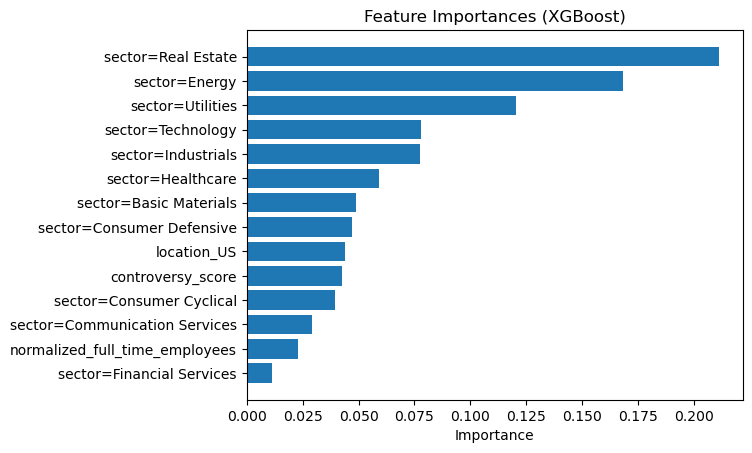

In [68]:
# Plot Feature Importances
top_features = feat_imp

plt.figure()
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel("Importance")
plt.title("Feature Importances (XGBoost)")
plt.gca().invert_yaxis()  # highest importance at top
plt.show()